In [25]:
#BÀI tiền giấy

In [26]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [27]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [28]:
path = "/content/drive/MyDrive/tiengiay"

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale=1/255)  


In [30]:
train_gen = train_data_gen.flow_from_directory(path, target_size=(50,50), class_mode='categorical')      


Found 100 images belonging to 10 classes.


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten


In [32]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(50,50,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(252,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 50, 50, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 50, 50, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 25, 25, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                  

In [33]:
history = model.fit(train_gen,batch_size=128,epochs=50,verbose=1,validation_data=(train_gen))


Epoch 1/50
4/4 [==============================] - 18s 5s/step - loss: 3.5108 - accuracy: 0.0600 - val_loss: 2.3660 - val_accuracy: 0.1500
Epoch 2/50
4/4 [==============================] - 0s 136ms/step - loss: 2.3936 - accuracy: 0.0700 - val_loss: 2.3263 - val_accuracy: 0.1000
Epoch 3/50
4/4 [==============================] - 0s 152ms/step - loss: 2.3276 - accuracy: 0.1000 - val_loss: 2.2899 - val_accuracy: 0.1600
Epoch 4/50
4/4 [==============================] - 0s 133ms/step - loss: 2.2925 - accuracy: 0.1500 - val_loss: 2.2799 - val_accuracy: 0.1100
Epoch 5/50
4/4 [==============================] - 0s 136ms/step - loss: 2.2871 - accuracy: 0.0900 - val_loss: 2.2571 - val_accuracy: 0.1000
Epoch 6/50
4/4 [==============================] - 0s 137ms/step - loss: 2.2440 - accuracy: 0.1300 - val_loss: 2.1862 - val_accuracy: 0.3700
Epoch 7/50
4/4 [==============================] - 0s 132ms/step - loss: 2.1798 - accuracy: 0.2900 - val_loss: 2.2049 - val_accuracy: 0.1400
Epoch 8/50
4/4 [======

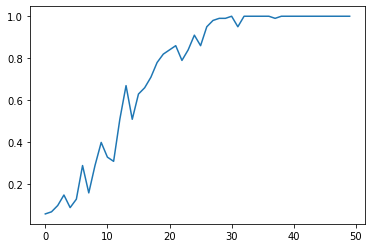

In [34]:
plt.plot(history.history['accuracy'])

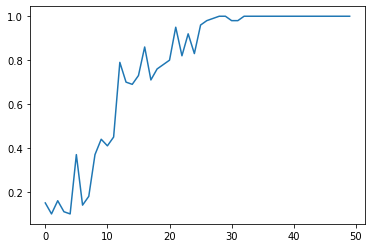

In [35]:
plt.plot(history.history['val_accuracy'])

In [38]:
model.save('tiengiay.h5')

kết quả dự đoán


'200k'

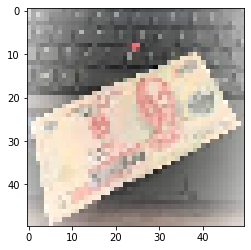

In [54]:
import numpy as np
from numpy import argmax
from keras.saving.save import load_model
#load model
model= load_model('tiengiay.h5')
from keras.preprocessing.image import load_img,img_to_array
#tạo dictionary
label= {0:'1k',
         1:'10k',
         2:'100k',
         3:'2k',
         4:'20k',
         5:'200k',
         6:'100k',
         7:'50k',
         8:'500',
         9:'500k'}
#load ảnh resize 50x50
img= load_img('88.jpg',target_size=(50,50))
#show hình ảnh
plt.imshow(img)
img= img_to_array(img)


img= img.reshape(1,50,50,3)
#dự đoán kết quả
result= model.predict(img)
print('kết quả dự đoán')

label[int(np.argmax(model.predict(img),axis=1))]



kết quả dự đoán


'200k'

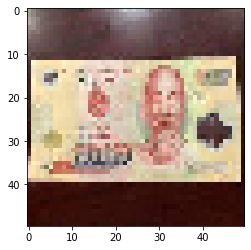

In [48]:
img= load_img('86.jpg',target_size=(50,50))
#show hình ảnh
plt.imshow(img)
img= img_to_array(img)


img= img.reshape(1,50,50,3)
#dự đoán kết quả
result= model.predict(img)
print('kết quả dự đoán')

label[int(np.argmax(model.predict(img),axis=1))]

kết quả dự đoán


'100k'

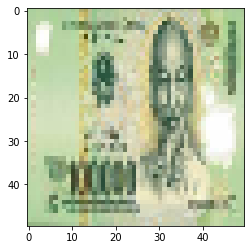

In [51]:
img= load_img('72.jpg',target_size=(50,50))
#show hình ảnh
plt.imshow(img)
img= img_to_array(img)


img= img.reshape(1,50,50,3)
#dự đoán kết quả
result= model.predict(img)
print('kết quả dự đoán')
label[int(np.argmax(model.predict(img),axis=1))]

kết quả dự đoán


'100k'

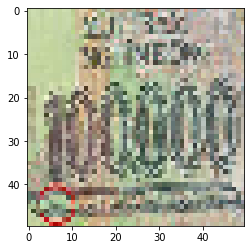

In [50]:
img= load_img('78.jpg',target_size=(50,50))
#show hình ảnh
plt.imshow(img)
img= img_to_array(img)


img= img.reshape(1,50,50,3)
#dự đoán kết quả
result= model.predict(img)
print('kết quả dự đoán')
label[int(np.argmax(model.predict(img),axis=1))]


kết quả dự đoán


'10k'

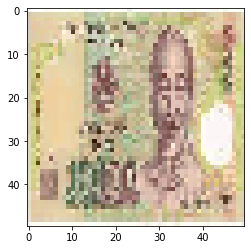

In [55]:
img= load_img('41.jpg',target_size=(50,50))
#show hình ảnh
plt.imshow(img)
img= img_to_array(img)


img= img.reshape(1,50,50,3)
#dự đoán kết quả
result= model.predict(img)
print('kết quả dự đoán')
label[int(np.argmax(model.predict(img),axis=1))]

kết quả dự đoán


'2k'

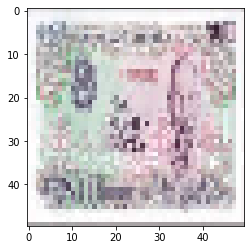

In [56]:
img= load_img('26.jpg',target_size=(50,50))
#show hình ảnh
plt.imshow(img)
img= img_to_array(img)


img= img.reshape(1,50,50,3)
#dự đoán kết quả
result= model.predict(img)
print('kết quả dự đoán')
label[int(np.argmax(model.predict(img),axis=1))]

kết quả dự đoán


'500'

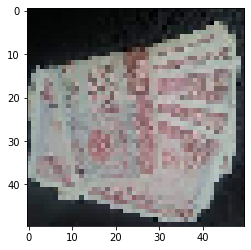

In [57]:
img= load_img('2.jpg',target_size=(50,50))
#show hình ảnh
plt.imshow(img)
img= img_to_array(img)


img= img.reshape(1,50,50,3)
#dự đoán kết quả
result= model.predict(img)
print('kết quả dự đoán')
label[int(np.argmax(model.predict(img),axis=1))]

kết quả dự đoán


'500k'

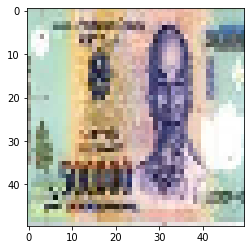

In [58]:
img= load_img('99.jpg',target_size=(50,50))
#show hình ảnh
plt.imshow(img)
img= img_to_array(img)


img= img.reshape(1,50,50,3)
#dự đoán kết quả
result= model.predict(img)
print('kết quả dự đoán')
label[int(np.argmax(model.predict(img),axis=1))]

kết quả dự đoán


'50k'

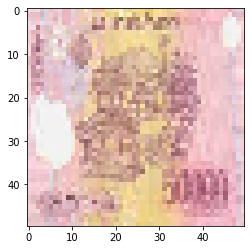

In [59]:
img= load_img('66.jpg',target_size=(50,50))
#show hình ảnh
plt.imshow(img)
img= img_to_array(img)


img= img.reshape(1,50,50,3)
#dự đoán kết quả
result= model.predict(img)
print('kết quả dự đoán')
label[int(np.argmax(model.predict(img),axis=1))]